<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_1_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import pandas as pd

In [2]:
boston = load_boston()
X,y   = (boston.data, boston.target)
boston.data[:2]
inputs = X.shape[1]

In [3]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

404

In [5]:
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.Sigmoid(),
    nn.Linear(50, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .001)

In [6]:
num_epochs = 8000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

In [7]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 100 == 0:
        print(f'Epoch {i}, loss = {loss:.3f}, test loss {test_loss:.3f}')

Epoch 100, loss = 361.638, test loss 343.932
Epoch 200, loss = 266.500, test loss 251.602
Epoch 300, loss = 199.701, test loss 187.212
Epoch 400, loss = 154.283, test loss 143.850
Epoch 500, loss = 124.788, test loss 116.070
Epoch 600, loss = 103.971, test loss 99.296
Epoch 700, loss = 84.527, test loss 83.124
Epoch 800, loss = 70.453, test loss 73.640
Epoch 900, loss = 61.279, test loss 66.028
Epoch 1000, loss = 54.815, test loss 61.762
Epoch 1100, loss = 49.963, test loss 57.453
Epoch 1200, loss = 44.407, test loss 53.828
Epoch 1300, loss = 38.060, test loss 47.988
Epoch 1400, loss = 33.572, test loss 44.470
Epoch 1500, loss = 30.324, test loss 44.872
Epoch 1600, loss = 26.943, test loss 40.902
Epoch 1700, loss = 24.669, test loss 39.671
Epoch 1800, loss = 22.695, test loss 39.206
Epoch 1900, loss = 20.979, test loss 37.579
Epoch 2000, loss = 19.474, test loss 37.252
Epoch 2100, loss = 17.688, test loss 36.072
Epoch 2200, loss = 16.643, test loss 34.744
Epoch 2300, loss = 15.765, tes

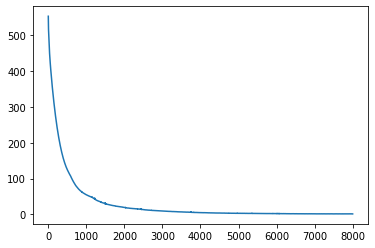

In [8]:
plt.plot(history)